## Ejercicios Evaluacion - Unidad III
- #### Taller de Programacion
- ##### Autor: Carlos Duran Palape
***

**Ejercicio 1**: Programación Orientada a Objetos (POO)

**Clase básica**
- Crea una clase Producto con atributos nombre, precio y stock. Agrega un método mostrar_info().


In [11]:
class Producto:
    def __init__(self, nombre, precio, stock):
        self.nombre = nombre,
        self.precio = precio,
        self.stock = stock

    def mostrar_info(self):
        print(f"{self.nombre} - {self.precio} Stock: {self.stock}.")

**Constructor y método personalizado**
- Agrega un método vender(cantidad) que descuente del stock si hay suficiente.

In [16]:
class Producto:
    def __init__(self, nombre, precio, stock):
        self.nombre = nombre,
        self.precio = precio,
        self.stock = stock

    def mostrar_info(self):
        print(f"{self.nombre} - {self.precio} Stock: {self.stock}.")

    def vender(self, cantidad): #Se agrega el metodo vender
        if cantidad <= self.stock:
            self.stock -= cantidad
            print(f"Venta realizada. Stock restante: {self.stock}")
        else:
            print("Stock insuficiente.")

*Encapsulamiento*
Modifica la clase Producto para que el atributo stock sea privado. Agrega métodos para consultar y modificar el stock.


In [13]:
class Producto:
    def __init__(self, nombre, precio, stock):
        self.nombre = nombre,
        self.precio = precio,
        self.__stock = stock #atributo privado

    def mostrar_stock(self):
        return self.__stock

**Herencia**
- Crea una clase ProductoDigital que herede de Producto y redefina el método mostrar_info() para incluir “descarga inmediata”.


In [17]:
class ProductoDigital(Producto):
    def mostrar_info(self):
        print(f"{self.nombre} - {self.precio} Descarga inmediata")

**Polimorfismo**
- Crea una lista con objetos Producto y ProductoDigital, recórrela y llama a mostrar_info().

In [18]:
productos = [Producto("Libro", 10000, 5), ProductoDigital("EBook", 5000, 0)]
for p in productos:
    p.mostrar_info()

('Libro',) - (10000,) Stock: 5.
('EBook',) - (5000,) Descarga inmediata


**Ejercicio 2**: Análisis de producción mensual

Consigna: Simula la producción mensual (en unidades) de una fábrica durante 12 meses.
- Crea un gráfico de líneas que muestre la evolución.
- Agrega etiquetas, título y cuadrícula.


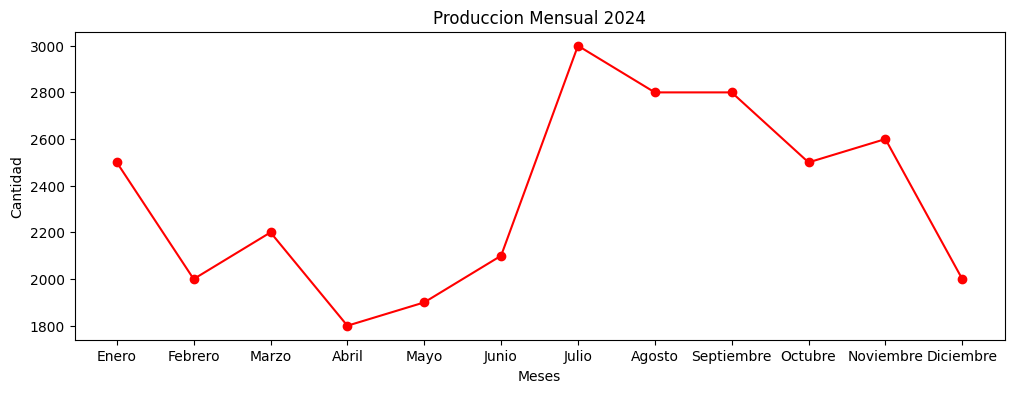

In [19]:
produccion = {
    "Enero": 2500,
    "Febrero": 2000,
    "Marzo": 2200,
    "Abril": 1800,
    "Mayo": 1900,
    "Junio": 2100,
    "Julio": 3000,
    "Agosto": 2800,
    "Septiembre": 2800,
    "Octubre": 2500,
    "Noviembre": 2600,
    "Diciembre": 2000
}

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(produccion.keys(), produccion.values(), marker="o", color="red")
plt.title("Produccion Mensual 2024")
plt.xlabel("Meses")
plt.ylabel("Cantidad")
plt.show()

**Ejercicio 3**: Manejo de Archivos .txt

*Guardar productos en archivo*
- Crea una función que reciba una lista de productos (nombre, precio, stock) y los guarde en un archivo .txt.

In [1]:
def guardar_productos(lista, archivo):
    with open(archivo, 'w') as f:
        for nombre, precio, stock in lista:
            f.write(f"{nombre},{precio},{stock}\n")

*Leer productos desde archivo* 
- Crea una función que lea el archivo anterior y retorne una lista de tuplas.

In [2]:
def leer_productos(archivo):
    productos=[]
    with open(archivo, 'r') as f:
        for linea in f:
            partes = linea.strip().split(',')
            productos.append((partes[0], float(partes[1]), int(partes[2])))
    return productos

*Validación de datos*
- Agrega manejo de excepciones para validar que el archivo existe y que los datos son numéricos.

In [3]:
try:
    productos = leer_productos("productos.txt")
except FileNotFoundError:
    print("Archivo no encontrado")
except ValueError:
    print("Error en formato de datos")

Archivo no encontrado


*Buscar producto por nombre*
- Implementa una función que reciba el nombre de un producto y lo busque en el archivo.

In [4]:
def buscar_producto(nombre, archivo):
    productos = leer_productos(archivo)
    for p in productos:
        if p[0].lower() == nombre.lower():
            return p
    return None

*Actualizar stock desde archivo*
- Crea una función que permita modificar el stock de un producto en el archivo.

In [5]:
def actualizar_stock(nombre, nuevo_stock, archivo):
    productos = leer_productos(archivo)
    with open(archivo, 'w') as f:
        for p in productos:
            if p[0].lower() == nombre.lower():
                f.write(f"{p[0]},{p[1]},{nuevo_stock}\n")
            else:
                f.write(f"{p[0]},{p[1]},{p[2]}\n")    

**Ejercicio 4**: Comparación de sensores

Consigna:

Simula lecturas de dos sensores (temperatura y humedad) durante 10 minutos.
- Crea un gráfico de dispersión que compare ambas variables.
- Agrega leyenda, colores distintos y cuadrícula.


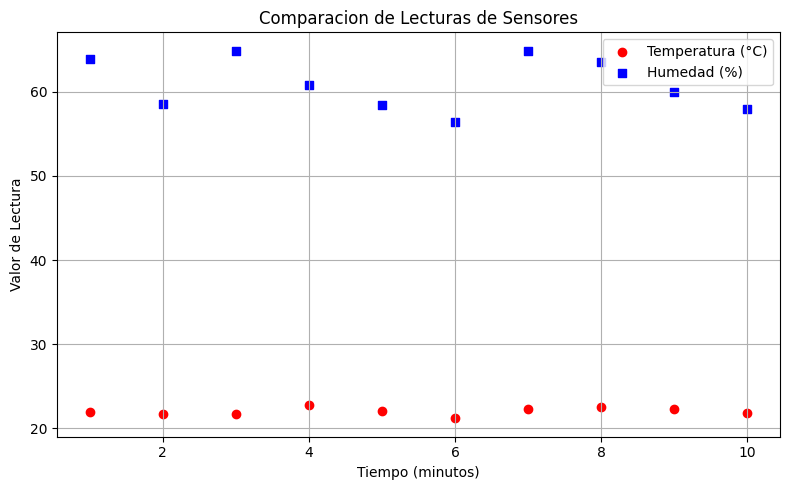

In [6]:
import matplotlib.pyplot as plt
import numpy as np

tiempo = np.arange(1, 11)
temperatura = [22 + np.random.uniform(-1, 1) for _ in tiempo]
humedad = [60 + np.random.uniform(-5, 5) for _ in tiempo]

plt.figure(figsize=(8, 5))
plt.scatter(tiempo, temperatura, color='red', label='Temperatura (°C)', marker='o')
plt.scatter(tiempo, humedad, color='blue', label='Humedad (%)', marker='s')
plt.title('Comparacion de Lecturas de Sensores')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Valor de Lectura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Ejercicio 5**: pandas y análisis de datos

*Crear DataFrame*
- Crea un DataFrame con columnas Producto, Precio, Stock.

In [7]:
import pandas as pd

datos = {
    "Producto":["A","B","C"],
    "Precio":[1000,2000,1500],
    "Stock":[10, 5, 8]
}
df = pd.DataFrame(datos)
df.head()

,Producto,Precio,Stock
0,A,1000,10
1,B,2000,5
2,C,1500,8


*Agregar columna calculada*
- Agrega una columna ValorTotal = Precio * Stock.

In [8]:
df["ValorTotal"] = df["Precio"] * df["Stock"]
df.head()

,Producto,Precio,Stock,ValorTotal
0,A,1000,10,10000
1,B,2000,5,10000
2,C,1500,8,12000


*Filtrar productos caros*
- Muestra solo los productos con precio mayor a $1000.

In [9]:
df_filtrado = df[df["Precio"] > 1000]
df_filtrado.head()

,Producto,Precio,Stock,ValorTotal
1,B,2000,5,10000
2,C,1500,8,12000


*Guardar DataFrame en CSV*
- Guarda el DataFrame en un archivo productos.csv.

In [10]:
df.to_csv("productos.csv", index=False)

*Leer CSV y mostrar resumen*
- Lee el archivo productos.csv y muestra las primeras 5 filas.

In [11]:
df_leido=pd.read_csv("productos.csv")
df_leido.head()

,Producto,Precio,Stock,ValorTotal
0,A,1000,10,10000
1,B,2000,5,10000
2,C,1500,8,12000


**Ejercicio 6**: Clases, objetos y lógica aplicada

*Clase Sensor*
- Crea una clase Sensor con atributos tipo, valor, unidad. Agrega un método leer() que imprima el valor con su unidad.

In [12]:
class Sensor:
    def __init__(self, tipo, valor, unidad):
        self.tipo = tipo
        self.valor = valor
        self.unidad = unidad

    def leer(self):
        print(f"Valor del sensor ({self.tipo}): {self.valor} {self.unidad}")

# Ejemplo de uso
sensor_temperatura = Sensor("Temperatura", 23.5, "°C")
sensor_temperatura.leer()

Valor del sensor (Temperatura): 23.5 °C


*Simulación de lectura*
- Crea una lista de sensores y simula lecturas con valores aleatorios usando random.

In [13]:
import random

class Sensor:
    def __init__(self, tipo, unidad):
        self.tipo = tipo
        self.unidad = unidad
        self.valor = 0

    def leer(self):
        print(f"{self.tipo}: {self.valor:.2f} {self.unidad}")

    def simular_lectura(self):
        if self.tipo == "Temperatura":
            self.valor = random.uniform(-10, 40)  # grados Celsius
        elif self.tipo == "Humedad":
            self.valor = random.uniform(0, 100)   # porcentaje
        elif self.tipo == "Presión":
            self.valor = random.uniform(950, 1050)  # hPa
        elif self.tipo == "Luz":
            self.valor = random.uniform(0, 1000)  # lux
        else:
            self.valor = random.random() * 100

# Crear una lista de sensores
sensores = [
    Sensor("Temperatura", "°C"),
    Sensor("Humedad", "%"),
    Sensor("Presión", "hPa"),
    Sensor("Luz", "lux")
]

# Simular lecturas
print("Lecturas simuladas:")
for sensor in sensores:
    sensor.simular_lectura()
    sensor.leer()

Lecturas simuladas:
Temperatura: 2.88 °C
Humedad: 68.00 %
Presión: 1032.12 hPa
Luz: 676.31 lux


*Clase con validación*
- Modifica la clase Sensor para validar que el valor esté dentro de un rango permitido.

In [14]:
import random

class Sensor:
    def __init__(self, tipo, unidad, minimo, maximo):
        self.tipo = tipo
        self.unidad = unidad
        self.minimo = minimo
        self.maximo = maximo
        self.valor = 0

    def leer(self):
        print(f"{self.tipo}: {self.valor:.2f} {self.unidad}")

    def simular_lectura(self):
        valor_simulado = random.uniform(self.minimo - 10, self.maximo + 10)
        if self.minimo <= valor_simulado <= self.maximo:
            self.valor = valor_simulado
        else:
            print(f"⚠️ Lectura fuera de rango para {self.tipo}: {valor_simulado:.2f} {self.unidad}")
            self.valor = max(min(valor_simulado, self.maximo), self.minimo)

# Crear sensores con rangos válidos
sensores

*Contador de instancias*
- Agrega una variable de clase que cuente cuántos sensores han sido creados.

In [15]:
import random

class Sensor:
    contador_sensores = 0  # Variable de clase

    def __init__(self, tipo, unidad, minimo, maximo):
        self.tipo = tipo
        self.unidad = unidad
        self.minimo = minimo
        self.maximo = maximo
        self.valor = 0
        Sensor.contador_sensores += 1  # Incrementa el contador al crear una instancia

    def leer(self):
        print(f"{self.tipo}: {self.valor:.2f} {self.unidad}")

    def simular_lectura(self):
        valor_simulado = random.uniform(self.minimo - 10, self.maximo + 10)
        if self.minimo <= valor_simulado <= self.maximo:
            self.valor = valor_simulado
        else:
            print(f"⚠️ Lectura fuera de rango para {self.tipo}: {valor_simulado:.2f} {self.unidad}")
            self.valor = max(min(valor_simulado, self.maximo), self.minimo)

    @classmethod
    def mostrar_contador(cls):
        print(f"Total de sensores creados: {cls.contador_sensores}")

# Crear sensores
sensores = [
    Sensor("Temperatura", "°C", -10, 40),
    Sensor("Humedad", "%", 0, 100),
    Sensor("Presión", "hPa", 950, 1050),
    Sensor("Luz", "lux", 0, 1000)
]

# Simular lecturas
print("Lecturas:")
for sensor in sensores:
    sensor.simular_lectura()
    sensor.leer()

# Mostrar cuántos sensores se han creado
Sensor.mostrar_contador()

Lecturas:
Temperatura: 3.50 °C
Humedad: 8.57 %
⚠️ Lectura fuera de rango para Presión: 945.23 hPa
Presión: 950.00 hPa
Luz: 466.68 lux
Total de sensores creados: 4


*Comparación entre objetos*
- Implementa un método comparar(sensor2) que indique cuál sensor tiene mayor valor.

**Ejercicio 7**: Comparación de ventas por categoría

Consigna:
Crea una lista de categorías de productos y sus ventas totales.
- Representa los datos en un gráfico de barras.
- Usa colores personalizados y ordena las categorías por ventas.

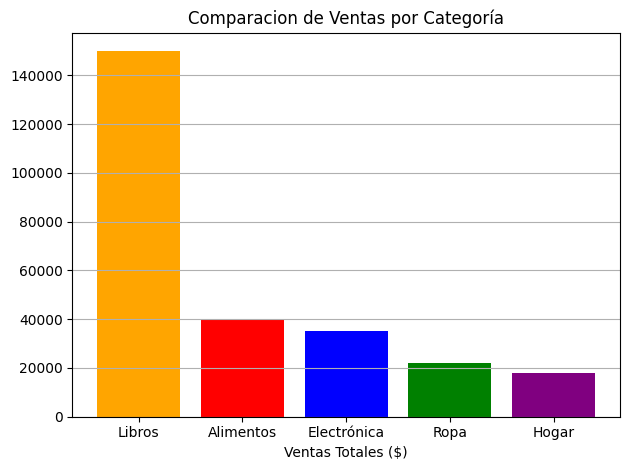

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

categorias = ['Electrónica','Ropa','Alimentos','Hogar','Libros']
ventas = [35000, 22000, 40000, 18000, 150000]
colores = ['blue', 'green', 'red', 'purple', 'orange']

df = pd.DataFrame({'Categoria': categorias, 'Ventas': ventas, 'Color': colores})
df_ordenado = df.sort_values(by='Ventas', ascending=False)

plt.Figure(figsize=(8, 5))
plt.bar(df_ordenado['Categoria'], df_ordenado['Ventas'], color=df_ordenado['Color'])
plt.title('Comparacion de Ventas por Categoría')
plt.xlabel('Ventas Totales ($)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Ejercicio 8**: Archivos y persistencia

*Guardar sensores en archivo*
- Crea una función que guarde los datos de sensores en un archivo .txt.


In [17]:
def guardar_sensores_txt(sensores, archivo):
    with open(archivo, 'w') as f:
        for sensor in sensores:
            f.write(str(sensor) + '\n')

*Leer sensores desde archivo*
- Crea una función que lea el archivo y reconstruya objetos Sensor.


In [18]:
def leer_sensores_txt(archivo):
    sensores = []
    try:
        with open(archivo, 'r') as f:
            for linea in f:
                linea = linea.strip()
                if ':' in linea and '[' in linea and ']' in linea:
                    tipo, resto = linea.split(':')
                    valor_str, unidad = resto.split('[')
                    valor = float(valor_str)
                    unidad = unidad.strip(']')
                    sensores.append(Sensor(tipo, valor, unidad))
    except FileNotFoundError:
        print('Archivo no encontrado.')
    return sensores

*Formato personalizado*
- Guarda los sensores en formato tipo:valor[unidad] y luego parsea ese formato al leer.


*Exportar a CSV*
- Exporta los sensores a un archivo .csv usando pandas.

In [19]:
import pandas as pd

def exportar_sensores_csv(sensores, archivo_csv):
    datos = {
        "Tipo": [s.tipo for s in sensores],
        "Valor": [s.valor for s in sensores],
        "Unidad": [s.unidad for s in sensores]
    }
    df = pd.DataFrame(datos)
    df.to_csv(archivo_csv, index=False)

*Importar desde CSV y filtrar* 
- Lee el archivo y muestra solo los sensores de tipo “temperatura”.

**Ejercicio 9**: Comparación de sensores

Consigna: Simula lecturas de dos sensores (temperatura y humedad) durante 10 minutos.
- Crea un gráfico de dispersión que compare ambas variables.
- Agrega leyenda, colores distintos y cuadrícula.


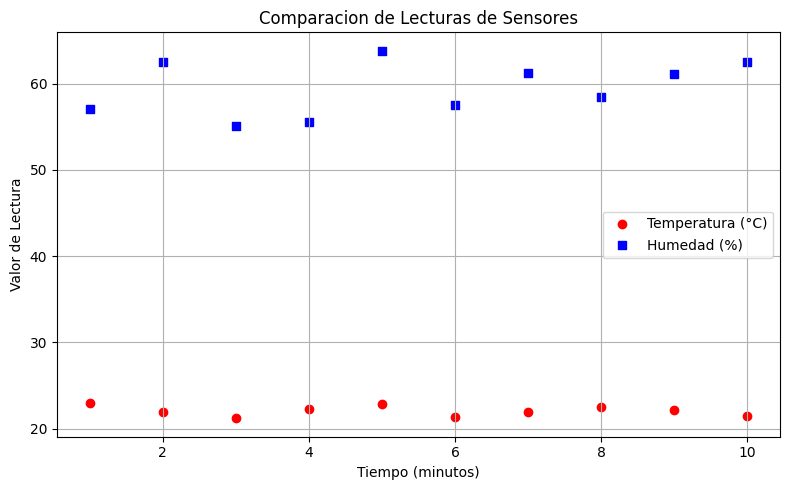

In [20]:
import matplotlib.pyplot as plt
import numpy as np

tiempo = np.arange(1, 11)
temperatura = [22 + np.random.uniform(-1, 1) for _ in tiempo]
humedad = [60 + np.random.uniform(-5, 5) for _ in tiempo]

plt.figure(figsize=(8, 5))
plt.scatter(tiempo, temperatura, color='red', label='Temperatura (°C)', marker='o')
plt.scatter(tiempo, humedad, color='blue', label='Humedad (%)', marker='s')
plt.title('Comparacion de Lecturas de Sensores')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Valor de Lectura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Ejercicio 10**: Evolución de visitas a un sitio web

Consigna: Simula el número de visitas diarias a un sitio web durante 15 días.
- Crea un gráfico de líneas que muestre la evolución.
- Agrega marcadores, título y etiquetas.

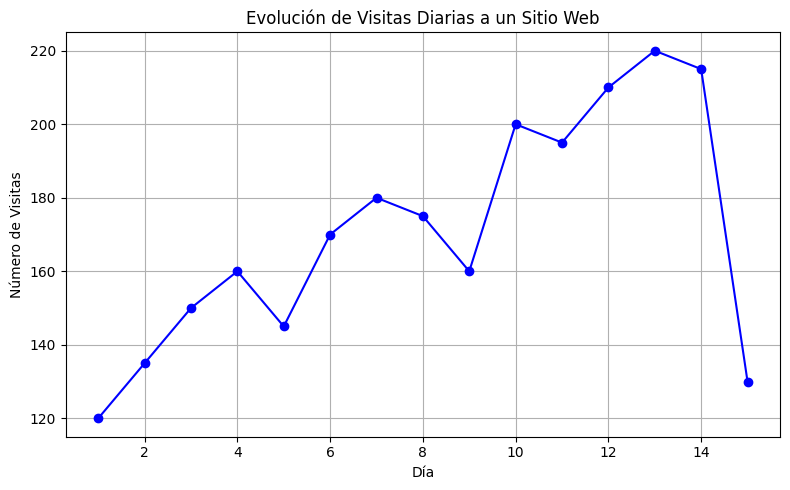

In [21]:
import matplotlib.pyplot as plt

dias = list(range(1, 16))
visitas = [120, 135, 150, 160, 145, 170, 180, 175, 160, 200, 195, 210, 220, 215, 130]

plt.figure(figsize=(8, 5))
plt.plot(dias, visitas, marker='o', linestyle='-', color='blue')
plt.title('Evolución de Visitas Diarias a un Sitio Web')
plt.xlabel('Día')
plt.ylabel('Número de Visitas')
plt.grid(True)
plt.tight_layout()
plt.show()

**Ejercicio 11**: Distribución de tiempo en actividades diarias

Consigna: Simula el tiempo dedicado a actividades como estudio, trabajo, ocio, sueño y transporte.
- Representa los datos en un gráfico circular.
- Usa autopct para mostrar porcentajes.

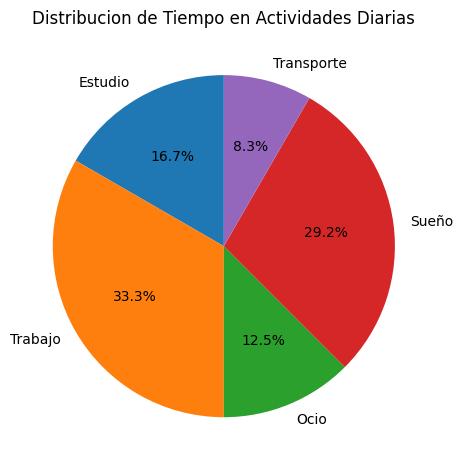

In [22]:
import matplotlib.pyplot as plt

actividades = ['Estudio', 'Trabajo', 'Ocio', 'Sueño', 'Transporte']
tiempo = [4, 8, 3, 7, 2]

plt.Figure(figsize=(6, 6))
plt.pie(tiempo, labels=actividades, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de Tiempo en Actividades Diarias')
plt.tight_layout()
plt.show()

**Ejercicio 12**: Comparación de rendimiento académico

Consigna: Simula el promedio de notas de 5 asignaturas en un curso.
- Representa los datos en un gráfico de barras vertical.
- Usa colores distintos para cada barra.


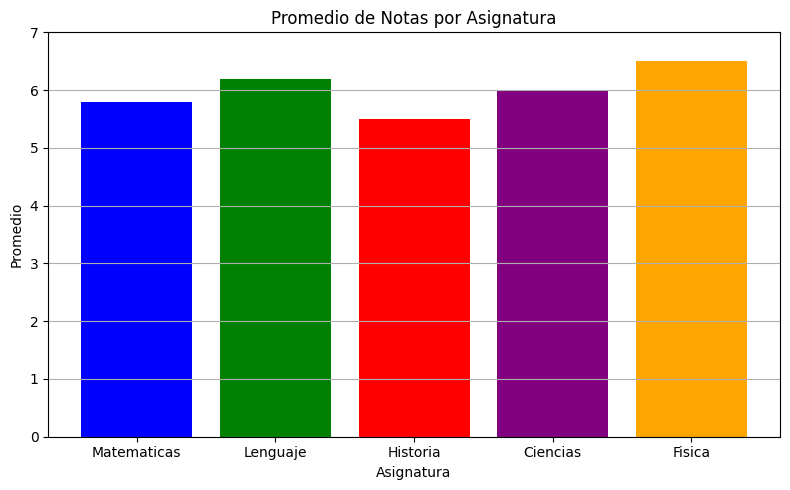

In [33]:
import matplotlib.pyplot as plt

asignaturas = ['Matematicas', 'Lenguaje', 'Historia', 'Ciencias', 'Fisica']
promedios = [5.8, 6.2, 5.5, 6.0, 6.5]
colores = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(8, 5))
plt.bar(asignaturas, promedios, color=colores)
plt.title('Promedio de Notas por Asignatura')
plt.xlabel('Asignatura')
plt.ylabel('Promedio')
plt.ylim(0, 7)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

***
- Nombre: Carlos Duran
- Seccion: 1, 2, 3
- Fecha: 30/10/2025 - 07/11/2025 - 06/11/2025
- Integral Dividida: $\int_{a}^{b} f(x)\, dx$
- [Indicadores Economicos](https://si3.bcentral.cl/Indicadoressiete/secure/Indicadoresdiarios.aspx)
- ![Imagen](https://www.udalba.cl/wp-content/uploads/2025/03/logo-horizontal-100px-universidad-del-alba.png)